In [670]:

library(ggplot2) 
library(dplyr)
options(repr.plot.height=4,repr.plot.width=6)


Cargar los datos en un dataframe llamado: airbnb

In [671]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [672]:
head(airbnb, 6)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [673]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")


In [674]:
colnames(airbnb) <- c(newnames)


In [675]:
colnames(airbnb)

[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [676]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903

In [677]:
head(airbnb, 5)


,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [678]:
airbnb$CodigoPostal[airbnb$CodigoPostal=='28']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='"']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='-']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002\n28002']<- '28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28051\n28051']<- '28051'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28004\n28004']<- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2804']<- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2805']<- '28005'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2815']<- '28015'
airbnb$CodigoPostal[airbnb$CodigoPostal == '280013']<- '28013'
airbnb$CodigoPostal[airbnb$CodigoPostal == 'Madrid 28004']<- '28004'
airbnb$CodigoPostal[grepl("^28", airbnb$CodigoPostal)== FALSE]<- NA

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [679]:

airbnb$CodigoPostal<-droplevels(airbnb$CodigoPostal)

length(unique(airbnb$CodigoPostal))

[1] 62

In [680]:
sort(unique(airbnb$CodigoPostal), decreasing = FALSE)

[1] 28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012
[13] 28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024
[25] 28025 28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036
[37] 28037 28038 28039 28040 28041 28042 28043 28044 28045 28046 28047 28048
[49] 28049 28050 28051 28052 28053 28054 28055 28056 28058 28060 28094 28105
[61] 28850
61 Levels: 28001 28002 28003 28004 28005 28006 28007 28008 28009 ... 28850

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [681]:
orderTable <-sort(table(airbnb$CodigoPostal), decreasing=TRUE)
orderTableFac<-factor(orderTable)
orderTableFac[1:5]
orderTableDecFalse <-sort(orderTableFac, decreasing=FALSE)
orderTableDecFalse[1:5]


28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 
51 Levels: 1 3 12 16 17 19 23 27 30 32 33 43 44 45 58 59 63 65 67 73 76 ... 2060

28048 28052 28056 28058 28060 
    1     1     1     1     1 
51 Levels: 1 3 12 16 17 19 23 27 30 32 33 43 44 45 58 59 63 65 67 73 76 ... 2060

¿Cuales son los barrios que hay en el código postal 28012?


In [682]:

barrios28012<-filter(airbnb, CodigoPostal=='28012')
barrios28012<- droplevels(barrios28012$Barrio)

table(barrios28012)


barrios28012
        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [683]:
table(barrios28012)



barrios28012
        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [684]:
length(table(airbnb$Barrio))
table(airbnb$Barrio)

[1] 125


                    Abrantes                      Acacias 
                          18                          145 
                     Adelfas                   Aeropuerto 
                          51                            6 
                     Aguilas             Alameda de Osuna 
                          15                           24 
                     Almagro                     Almenara 
                         155                           62 
                 Almendrales                       Aluche 
                          45                           45 
                      Ambroz                      Amposta 
                          12                            5 
            Apostol Santiago                     Arapiles 
                          15                          182 
                     Aravaca                        Arcos 
                          16                           18 
                   Argüelles                       Atoc

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [685]:
orderTableBarrio <-factor(sort(table(airbnb$Barrio), decreasing=TRUE))
orderTableBarrio[1:5]


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 
81 Levels: 2 3 4 5 6 7 8 9 12 13 14 15 16 17 18 19 20 21 22 24 26 28 30 ... 1844

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [686]:
table(airbnb$TipoAlquiler)


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


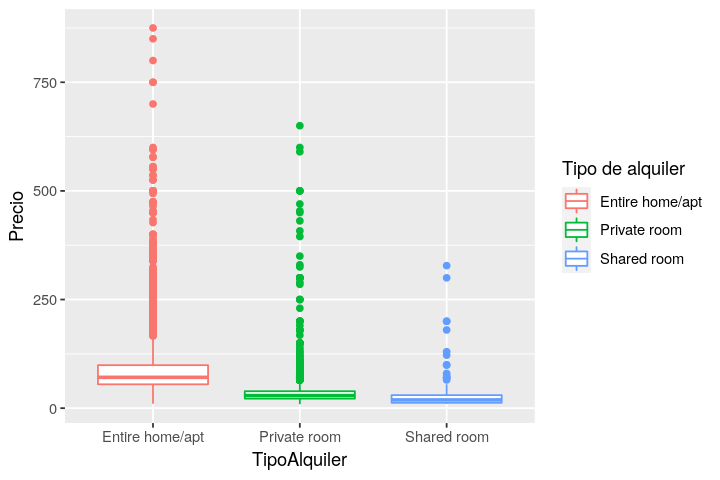

In [687]:

dataPrecios<- data.frame(airbnb[c("TipoAlquiler", "Precio")])

ggplot(data=dataPrecios, aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+
    geom_boxplot()+
    scale_color_discrete(name="Tipo de alquiler")
            


Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [688]:

entireHome<-filter(airbnb, TipoAlquiler=='Entire home/apt')
privateRoom<-filter(airbnb, TipoAlquiler=='Private room')
sharedRoom<-filter(airbnb, TipoAlquiler=='Shared room')

mediaEntireHome<-round(mean(entireHome$Precio, na.rm=T))
mediaPrivateRoom<-round(mean(privateRoom$Precio,na.rm=T))
mediaSharedRoom<-round(mean(sharedRoom$Precio,na.rm=T))

print(paste("la media de Entire Home es: ",mediaEntireHome))
print(paste("la media de Private Room es: ",mediaPrivateRoom))
print(paste("la media de SharedRoom es: ",mediaSharedRoom))

testEntire<-shapiro.test(entireHome$Precio[1:5000])
testPrivate<-shapiro.test(privateRoom$Precio[1:5000])
testShared<-shapiro.test(sharedRoom$Precio[1:5000])

print(paste("test shapiro Entire Home", testEntire$p.value))
print(paste("test shapiro Private Room", testPrivate$p.value))
print(paste( "test shapiro Shared Room", testShared$p.value))

[1] "la media de Entire Home es:  87"
[1] "la media de Private Room es:  34"
[1] "la media de SharedRoom es:  30"
[1] "test shapiro Entire Home 1.24077898621874e-72"
[1] "test shapiro Private Room 9.18974842339072e-85"
[1] "test shapiro Shared Room 4.51672121600842e-24"


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [689]:



airbnb_entire <-filter(airbnb, TipoAlquiler == "Entire home/apt" )

airbnb_entire




CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [690]:
orderTableBarrioEntire <-factor(sort(table(airbnb_entire$Barrio), decreasing=TRUE))
orderTableBarrioEntire[1:5]

Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 
57 Levels: 0 1 2 3 4 5 7 8 9 10 11 12 13 14 15 16 17 18 19 21 22 24 25 ... 1228

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [691]:


barrioPrecio <- aggregate(airbnb_entire[,c("Precio")], by = list(barrios = airbnb_entire$Barrio), FUN = mean, na.rm=TRUE)

colnames(barrioPrecio)<-c("Barrios", "PrecioMedio")

barrioPrecio$PrecioMedio<-as.factor(round(barrioPrecio$PrecioMedio))

barrioDeMayorAmenor<- data.frame(barrioPrecio[order(barrioPrecio$PrecioMedio, decreasing = TRUE),])

In [692]:
head(barrioDeMayorAmenor, 5)


,Barrios,PrecioMedio
,<fct>,<fct>
77,Palomas,310
50,Fuentelareina,180
93,Recoletos,162
43,El Plantío,150
27,Casco Histórico de Barajas,141


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [693]:
aptPalomas<- filter(airbnb_entire, airbnb_entire$Barrio == "Palomas")
print(paste("En Palomas hay", length(aptPalomas$Barrio)))
      
aptFuenteLaReina<- filter(airbnb_entire, airbnb_entire$Barrio == "Fuentelareina")
print(paste("En Fuente la Reina hay",length(aptFuenteLaReina$Barrio)))

aptRecoletos<- filter(airbnb_entire, airbnb_entire$Barrio == "Recoletos")
print(paste("En Recoletos hay", length(aptRecoletos$Barrio)))

aptElPlantio<- filter(airbnb_entire, airbnb_entire$Barrio == "El Plantío")
print(paste("En el Plantio hay", length(aptElPlantio$Barrio)))

aptCascoHistorico<- filter(airbnb_entire, airbnb_entire$Barrio == "Casco Histórico de Barajas")
print(paste("En el Casco Histórico de Barajas hay", length(aptCascoHistorico$Barrio)))







[1] "En Palomas hay 4"
[1] "En Fuente la Reina hay 2"
[1] "En Recoletos hay 135"
[1] "En el Plantio hay 1"
[1] "En el Casco Histórico de Barajas hay 8"


In [694]:
dfBarrio <- data.frame(Barrios = c(airbnb_entire$Barrio))
barrioFreq<-aggregate(dfBarrio$Barrios, dfBarrio, length)
colnames(barrioFreq)[2]<-"Freq"

In [695]:

newDfBarrioFreq<-merge(x = barrioFreq, y = barrioDeMayorAmenor, by = c("Barrios")) 

newDfBarrioFreq

Barrios,Freq,PrecioMedio
<fct>,<int>,<fct>
Abrantes,3,46
Acacias,61,68
Adelfas,33,69
Aeropuerto,2,38
Aguilas,2,54
Alameda de Osuna,4,139
Almagro,97,109
Almenara,25,66
Almendrales,18,78


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [696]:
barrioEjer1<- filter(newDfBarrioFreq, Freq > 100)
barrioEjer1<- head(barrioEjer1[order(barrioEjer1$PrecioMedio, decreasing = TRUE ),], 5)
barrioEjer1

,Barrios,Freq,PrecioMedio
,<fct>,<int>,<fct>
8,Recoletos,135,162
4,Goya,142,111
9,Sol,701,101
10,Trafalgar,223,99
5,Justicia,534,98


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 6 rows containing non-finite values (stat_density).”


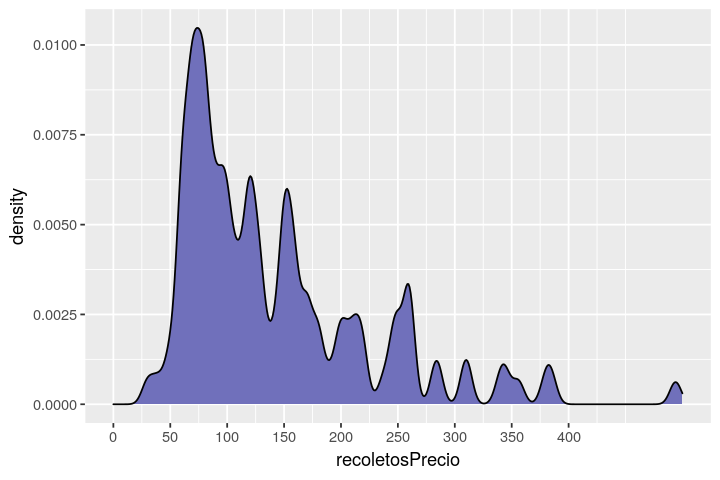

In [697]:
#Barrio Recoletos
recoletos<- filter(airbnb_entire, airbnb_entire$Barrio == "Recoletos")
recoletosPrecio<-na.omit(c(recoletos$Precio))
ggplot(data=data.frame(x=recoletosPrecio), aes(x=recoletosPrecio))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,400,50), lim=c(0,500))

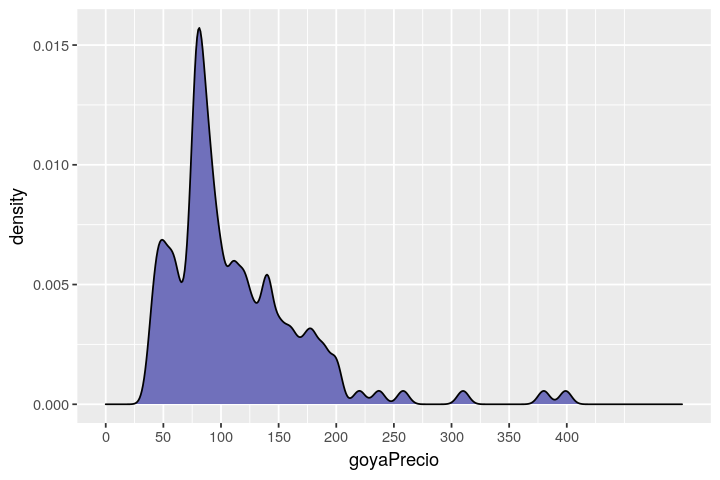

In [698]:
#Barrio Goya
goya<- filter(airbnb_entire, airbnb_entire$Barrio == "Goya")
goyaPrecio<-na.omit(c(goya$Precio))
ggplot(data=data.frame(x=goyaPrecio), aes(x=goyaPrecio))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,400,50), lim=c(0,500))

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


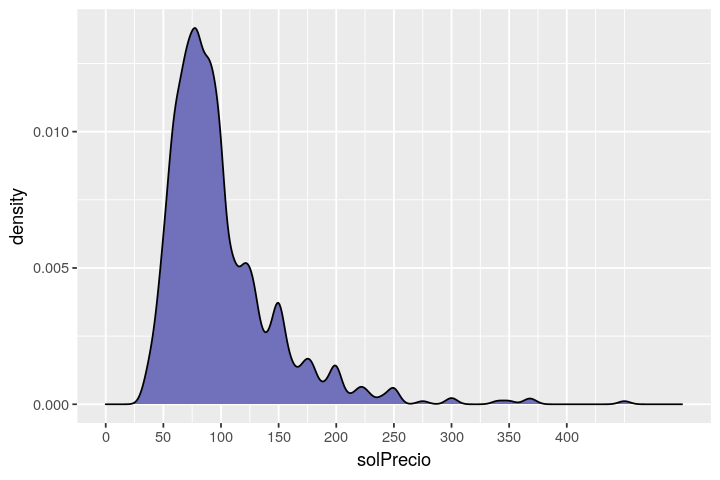

In [699]:
#Barrio Sol
sol<- filter(airbnb_entire, airbnb_entire$Barrio == "Sol")
solPrecio<-na.omit(c(sol$Precio))
ggplot(data=data.frame(x=solPrecio), aes(x=solPrecio))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,400,50), lim=c(0,500))

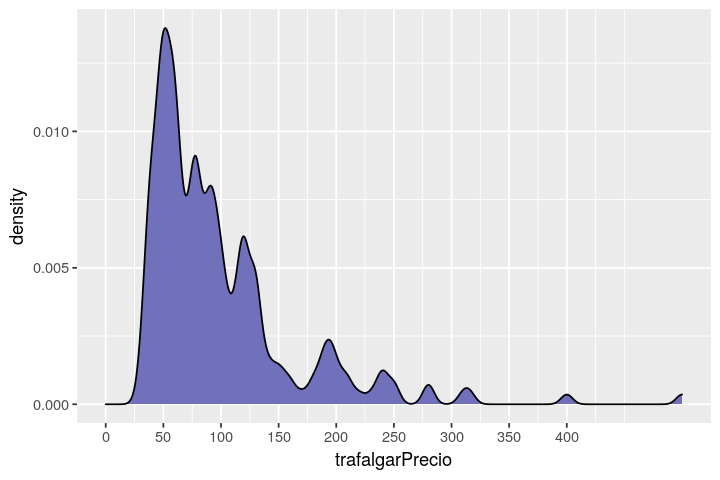

In [700]:
#Barrio Trafalgar
trafalgar<- filter(airbnb_entire, airbnb_entire$Barrio == "Trafalgar")
trafalgarPrecio<-na.omit(c(trafalgar$Precio))
ggplot(data=data.frame(x=trafalgarPrecio), aes(x=trafalgarPrecio))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,400,50), lim=c(0,500))

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


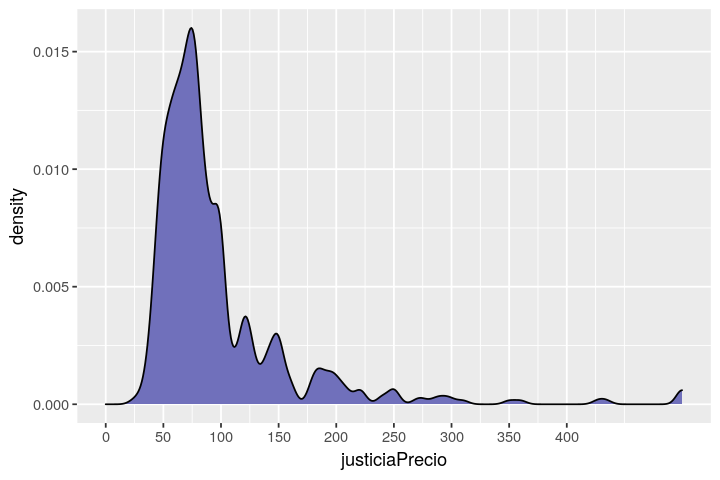

In [701]:
#Barrio Justicia
justicia<- filter(airbnb_entire, airbnb_entire$Barrio == "Justicia")
justiciaPrecio<-na.omit(c(justicia$Precio))
ggplot(data=data.frame(x=justiciaPrecio), aes(x=justiciaPrecio))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,400,50), lim=c(0,500))

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [702]:
barrioMetros <- aggregate(airbnb_entire[,c("MetrosCuadrados")], 
                          by = list(Barrios = airbnb_entire$Barrio), FUN = mean, na.rm=TRUE)
 
colnames(barrioMetros)[2]<-("MediaMetros")

newDfBarrioMetros<-merge(x = newDfBarrioFreq, y = barrioMetros, by = c("Barrios")) 

barrioEjer2<- filter(newDfBarrioMetros, Freq > 100)
barrioEjer2<- head(barrioEjer2[order(barrioEjer2$PrecioMedio, decreasing = TRUE ),], 5)
barrioEjer2

,Barrios,Freq,PrecioMedio,MediaMetros
,<fct>,<int>,<fct>,<dbl>
8,Recoletos,135,162,26.66316
4,Goya,142,111,51.68504
9,Sol,701,101,45.61692
10,Trafalgar,223,99,29.30426
5,Justicia,534,98,28.52669


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

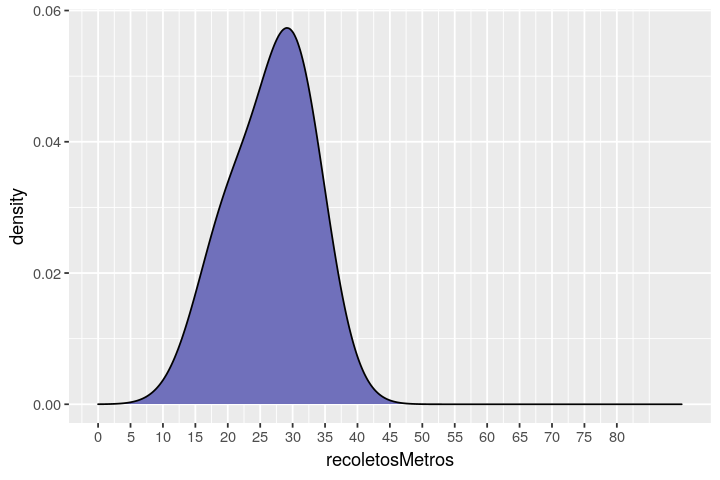

In [703]:
#Barrio Recoletos

recoletosMetros<-na.omit(c(recoletos$MetrosCuadrados))

ggplot(data=data.frame(x=recoletosMetros), aes(x=recoletosMetros))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,80,5), lim=c(0,90))






Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


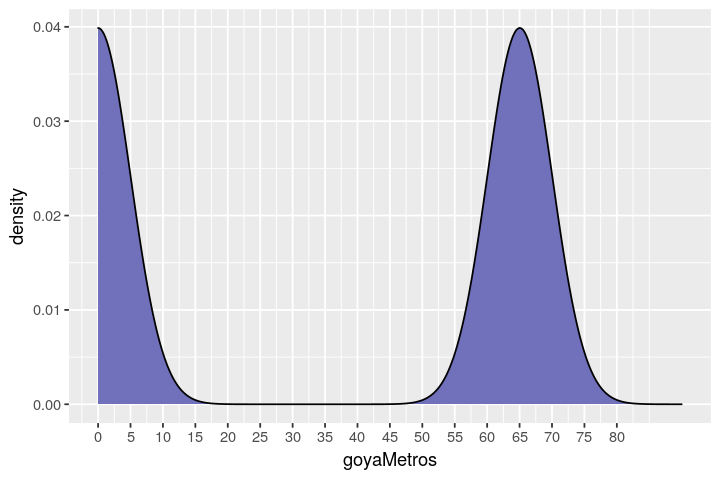

In [704]:
#Barrio Goya

goyaMetros<-na.omit(c(goya$MetrosCuadrados))

ggplot(data=data.frame(x=goyaMetros), aes(x=goyaMetros))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,80,5), lim=c(0,90))




Warning message:
“Removed 9 rows containing non-finite values (stat_density).”


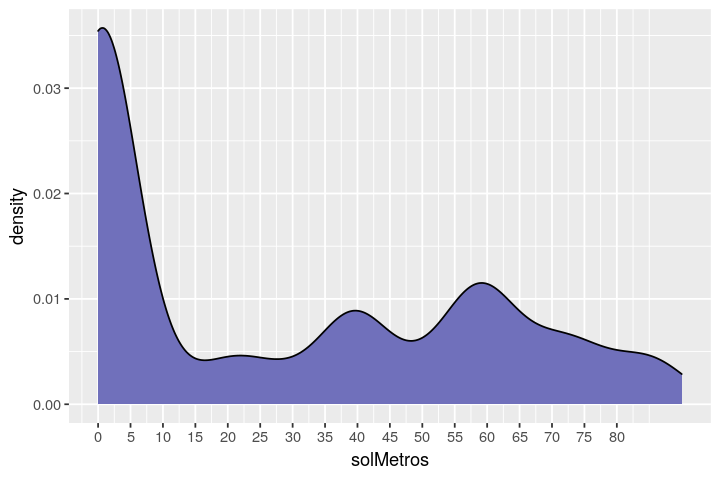

In [705]:
#Barrio Sol


solMetros<-na.omit(c(sol$MetrosCuadrados))

ggplot(data=data.frame(x=solMetros), aes(x=solMetros))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,80,5), lim=c(0,90))




Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


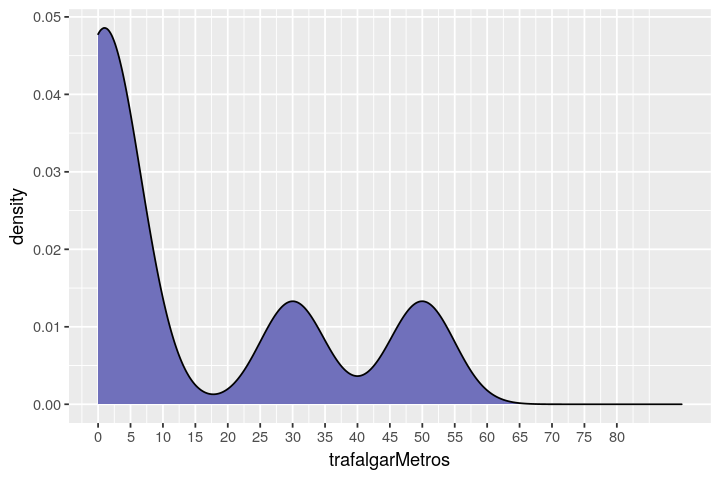

In [706]:
#Barrio Trafalgar


trafalgarMetros<-na.omit(c(trafalgar$MetrosCuadrados))

ggplot(data=data.frame(x=trafalgarMetros), aes(x=trafalgarMetros))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,80,5), lim=c(0,90))




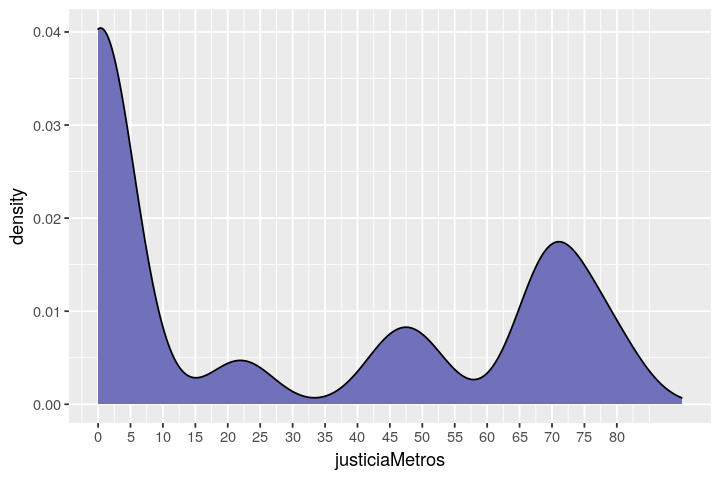

In [707]:
#Barrio Justicia


justiciaMetros<-na.omit(c(justicia$MetrosCuadrados))

ggplot(data=data.frame(x=justiciaMetros), aes(x=justiciaMetros))+
  geom_density(fill="#7070BB",color="#010101", bw=5) +
scale_x_continuous(breaks = seq(0,80,5), lim=c(0,90))




Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [708]:
recoletosTest<-shapiro.test(recoletos$MetrosCuadrados)
goyaTest<-shapiro.test(goya$MetrosCuadrados)
solTest<-shapiro.test(sol$MetrosCuadrados)
trafalgarTest<-shapiro.test(trafalgar$MetrosCuadrados)
justiciaTest<-shapiro.test(justicia$MetrosCuadrados)


print(paste("test shapiro Recoletos",recoletosTest))
print(paste("test shapiro Goya", goyaTest$p.value))
print(paste( "test shapiro Sol", solTest$p.value))
print(paste( "test shapiro Trafalgar", trafalgarTest$p.value))
print(paste( "test shapiro Justicia", justiciaTest$p.value))

[1] "test shapiro Recoletos c(W = 0.75)"                
[2] "test shapiro Recoletos 0"                          
[3] "test shapiro Recoletos Shapiro-Wilk normality test"
[4] "test shapiro Recoletos recoletos$MetrosCuadrados"  
[1] "test shapiro Goya 0.519924091564745"
[1] "test shapiro Sol 8.6913775134728e-07"
[1] "test shapiro Trafalgar 0.0127581397426826"
[1] "test shapiro Justicia 0.00064192630271212"


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [709]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [711]:

barrio_sol$MetrosCuadrados[is.na(barrio_sol$MetrosCuadrados)] <- 0
corVariables <- cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")])
corVariables


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.1420426
NumDormitorios,0.6761906,1.0000000,0.7594598,0.1641938
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.1584291
MetrosCuadrados,0.1420426,0.1641938,0.1584291,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 652 rows containing non-finite values (stat_density).”


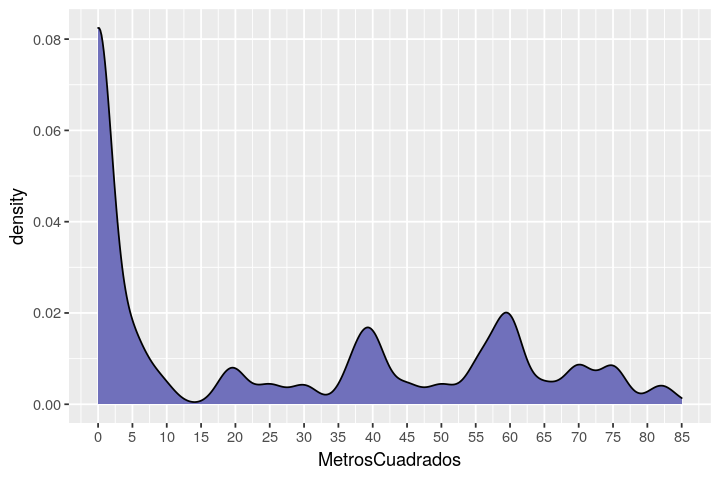

In [712]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

ggplot(barrio_sol, aes(x=MetrosCuadrados))+
  geom_density(fill="#7070BB",color="#010101", bw=2)+
scale_x_continuous(breaks = seq(0,200,5), lim=c(0,85))


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [713]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol" & MetrosCuadrados>15)

cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")])

model<-lm(barrio_sol,formula=Precio~NumBanyos+NumDormitorios+MetrosCuadrados+MaxOcupantes)
summary(model)
confint(model)["MetrosCuadrados",]

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7292599,0.8589205,0.6113095
NumDormitorios,0.7292599,1.0000000,0.7855310,0.8215065
MaxOcupantes,0.8589205,0.7855310,1.0000000,0.7121088
MetrosCuadrados,0.6113095,0.8215065,0.7121088,1.0000000



Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + 
    MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.852 -13.673  -5.048  18.523  69.473 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0362    12.9584   2.164  0.03859 * 
NumBanyos         0.5647    14.6038   0.039  0.96941   
NumDormitorios   28.2119     8.5440   3.302  0.00249 **
MetrosCuadrados   0.2237     0.2050   1.091  0.28393   
MaxOcupantes      2.6738     4.4329   0.603  0.55093   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


2.5 %     97.5 % 
-0.1950286  0.6424357

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [714]:
#numDormitorios

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [715]:

model<-lm(barrio_sol,formula=Precio~NumDormitorios)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [716]:
confint(model)["NumDormitorios",]

2.5 %   97.5 % 
31.18746 47.78095

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [717]:
 aptTresDorm<- nrow(barrio_sol[barrio_sol$TipoPropiedad == 'Apartment' & barrio_sol$NumDormitorios == 3,])
total <- nrow(barrio_sol[barrio_sol$TipoPropiedad == 'Apartment',])
probabilidad<-aptTresDorm/total
probabilidad

[1] 0.09677419

In [718]:

binomTest<- binom.test(aptTresDorm,total)
binomTest


	Exact binomial test

data:  aptTresDorm and total
number of successes = 3, number of trials = 31, p-value = 4.649e-06
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.02041986 0.25753906
sample estimates:
probability of success 
            0.09677419 
